# Nested Loops Are Bad In Python

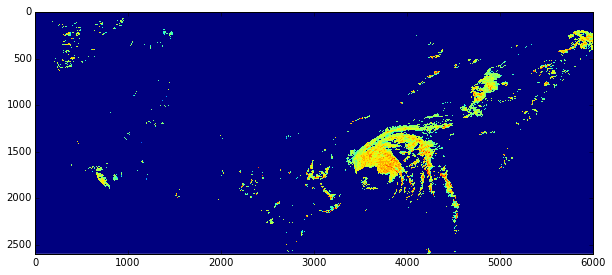

In [1]:
import numpy as np
import time
import urllib2

from scipy.ndimage import imread
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10., 10.)

img = imread('n0r_200508300000.png')
plt.imshow(img,interpolation='none')

Recently, I wanted to save pixel values that exceeded a particular threshold.  Each pixel eventually needed to be a data point.

Initially, I tried a nested loop

In [2]:
results = []
coordinates = []

time1 = time.time()
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] > 10:
            results.append(img[i,j])
            coordinates.append((i,j))
            
print "Nested loop took:", time.time() - time1, "seconds"
            

Nested loop took: 208.661000013 seconds


That is very slow.  Numpy can help.

In [3]:
results_np = []

time1 = time.time()
coordinates_np = np.where(img > 10)

for x,y in zip(coordinates_np[0],coordinates_np[1]):
    results_np.append(img[x,y])
    
print "Numpy where took:", time.time() - time1, "seconds"

Numpy where took: 0.960999965668 seconds


In [19]:
x = [z[0] for z in coordinates]
y = [z[1] for z in coordinates]

x_np = coordinates_np[0]
y_np = coordinates_np[1]

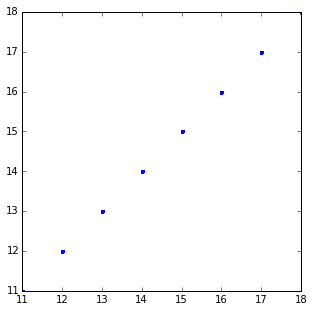

In [18]:
plt.plot(results_np,results,".")

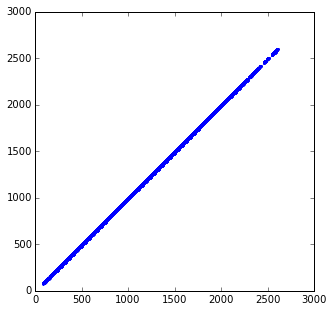

In [22]:
plt.plot(x,x_np,".")

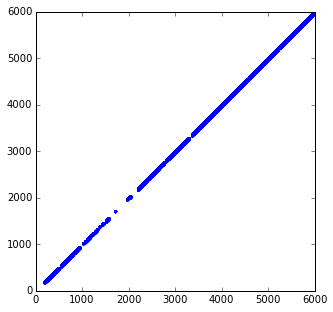

In [25]:
plt.plot(y,y_np,".")